In [383]:
import numpy as np
import scipy.io as sio
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [3]:
mat_contents = sio.loadmat("mnist_digits.mat") # mat_contents['X'].shape = (10000, 784)

In [79]:
# testing
# select any sample from the 10,000 dataset
n = 279
# to see the Y value
print(mat_contents['Y'][n][0])
# to see the X value as image
Image.fromarray(mat_contents['X'][n].reshape(28,28),'L') 

6


In [69]:
dataset = np.concatenate((mat_contents['X'], mat_contents['Y']), axis=1) # X, Y = dataset[:,:-1], Y dataset[:,-1] 

In [503]:
class Percepton:

    def __init__(self, dataset, ratio=0.8, max_iter=10, digit=0):
        self.ratio = ratio
        self.max_iter = max_iter
        self.dataset = dataset
        
        msk = np.random.rand(len(dataset)) < ratio
        self.train_data = dataset[msk]
        self.test_data = dataset[~msk]
       
    def resplit(self, ratio=0.8):
        msk = np.random.rand(len(dataset)) < ratio
        self.train_data = self.dataset[msk]
        self.test_data = self.dataset[~msk]
        return
    
    def build_v0(self, digit):
        
        if len(self.train_data)==0:
            return [[]]
        
        w = np.zeros((len(self.train_data[0]), 1))
        
        for i in range(self.max_iter):

            datapoint = self.train_data[i%(len(self.train_data)+1)]
            y = 1 if (datapoint[-1] == digit) else -1
            x = datapoint[:-1]

            if y*x.dot(w[1:])[0] + w[0][0] <= 0:

                w[1:] = w[1:] + y*x.reshape(784,1)
                w[0] = w[0] + y

        return w
    
    def build_v1(self, digit):
        
        if len(self.train_data)==0:
            return [[]]
        
        w = np.zeros((len(self.train_data[0]), 1))
        
        for i in range(self.max_iter):
        
            datapoint_min = self.train_data[0]
            y_min = 1 if (datapoint_min[-1] == digit) else -1
            x_min = datapoint_min[:-1]
            a_min = y_min*x_min.dot(w[1:])[0] + w[0][0]

            for datapoint in self.train_data:

                y = 1 if (datapoint[-1] == digit) else -1
                x = datapoint[:-1]
                a = y*x.dot(w[1:])[0] + w[0][0]

                if a < a_min:
                    datapoint_min = datapoint
                    y_min = y
                    x_min = x
                    a_min = a

            if a_min <= 0:
                w[1:] = w[1:] + y_min * x_min.reshape(784,1)
                w[0] = w[0] + y_min

        return w

    def build_v2(self, digit):
        
        w = np.zeros((len(train_data[0]), 1))
        w_list = [w]
        c = np.zeros(len(train_data[0]))
        k = 1

        for i in range(self.max_iter):

            datapoint = self.train_data[i%(len(self.train_data)+1)]
            y = 1 if (datapoint[-1] == digit) else -1
            x = datapoint[:-1]

            if y*x.dot(w[1:])[0] + w[0][0] <= 0:

                w[1:] = w[1:] + y*x.reshape(784,1)
                w[0] = w[0] + y
                c[k+1] = 1
                k += 1
                w_list.append(w)

            else:

                c[k] += 1

        return w_list, c, k
    
    @staticmethod
    def test(test_datapoint, w):
        return np.sign(test_datapoint[:-1].dot(w[1:])[0] + w[0][0])
    
    @staticmethod
    def test_v2(test_datapoint, w_list, c, k):
        res = 0
        for i in range(k):
            w = w_list[i]
            res += c[i] * np.sign(test_datapoint[:-1].dot(w[1:])[0] + w[0][0])
        return np.sign(res)

    def accuracy_v0(self, digit):
    
        count = 0
        total = len(self.test_data)
        if total == 0:
            return 0
        
        w = self.build_v0(digit)

        for datapoint in self.test_data:

            if (Percepton.test(datapoint, w) == 1 and datapoint[-1] == digit) \
            or (Percepton.test(datapoint, w) == -1 and datapoint[-1] != digit):
                count += 1

        return count/total
    
    def accuracy_v1(self, digit):
    
        count = 0
        total = len(test_data)
        w = self.build_v1(digit)

        for datapoint in self.test_data:

            if (Percepton.test(datapoint, w) == 1 and datapoint[-1]==digit) \
            or (Percepton.test(datapoint, w) == -1 and datapoint[-1]!=digit):
                count += 1

        return count/total
    
    def accuracy_v2(self, digit):

        count = 0
        total = len(test_data)
        if total == 0:
            return 0
        
        self.build_v2(digit)

        for datapoint in self.test_data:

            if (Percepton.test_v2(datapoint, self.weights, self.c, self.k) == 1 and datapoint[-1]==digit) \
            or (Percepton.test_v2(datapoint, self.weights, self.c, self.k) == -1 and datapoint[-1]!=digit):
                count += 1
        
        return count/total

## Results for V0

In [455]:
p = Percepton(dataset, 0.8, 10, 0)
print(p.accuracy_v0(0))

0.8846350178662583


In [456]:
RATIO = 0.8
ITER = 10

for num in range(10):
    p = Percepton(dataset, RATIO, ITER, num)
    print('For digit {}, the accuracy of V0 is {}.'\
          .format(num, p.accuracy_v0(num)))

For digit 0, the accuracy of V0 is 0.9063278525161933.
For digit 1, the accuracy of V0 is 0.884990253411306.
For digit 2, the accuracy of V0 is 0.910417715148465.
For digit 3, the accuracy of V0 is 0.8940998487140696.
For digit 4, the accuracy of V0 is 0.9131313131313131.
For digit 5, the accuracy of V0 is 0.8565910188314824.
For digit 6, the accuracy of V0 is 0.9000512557662738.
For digit 7, the accuracy of V0 is 0.895492818226845.
For digit 8, the accuracy of V0 is 0.9098563645368994.
For digit 9, the accuracy of V0 is 0.8910989557434112.


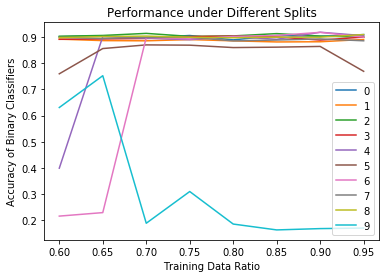

In [478]:
# Plot accuracy against ratio
# model: v0

ITER = 10
x_data = np.arange(0.6, 1.0, 0.05)

for digit in range(10):
    y_data = []
    for ratio in x_data:
        p = Percepton(dataset, ratio, ITER, digit)
        y_data.append(p.accuracy_v0(digit))
    plt.plot(x_data, y_data, label = str(digit))

plt.legend(loc='lower right')
plt.xlabel('Training Data Ratio')
plt.ylabel('Accuracy of Binary Classifiers')
plt.title('Performance under Different Splits')
plt.savefig('classP_splits_v0_digits.png')

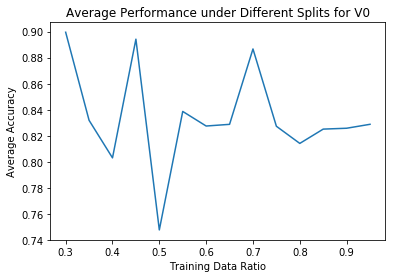

In [460]:
# Plot accuracy against ratio, 
# model: v0
# avarage of N runs

N = 1
ITER = 10
x_data = np.arange(0.6, 1.0, 0.05)
y_data = []

for n in range(N):
    y_ = []
    for ratio in x_data:
        a = []
        for digit in range(10):
            p = Percepton(dataset, ratio, ITER, digit)
            a.append(p.accuracy_v0(digit))
        y_.append(np.mean(a))
    
    y_data.append(y_)
    
y_data = np.mean(y_data, axis=0)

plt.plot(x_data, y_data)
plt.xlabel('Training Data Ratio')
plt.ylabel('Average Accuracy')
plt.title('Average Performance under Different Splits for V0')
plt.savefig('classP_splits_v0_smoothed.png')

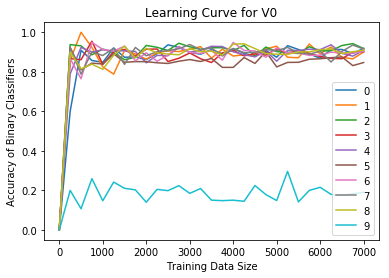

In [498]:
# Plot accuracy against training size
# model: v0

ITER = 100
RATIO = 0.7
x_data = np.arange(1, len(train_data), 250)

for digit in range(10):
    y_data = []
    for threshold in x_data:
        p = Percepton(dataset[:threshold], ratio, ITER, digit)
        y_data.append(p.accuracy_v0(digit))
    plt.plot(x_data, y_data, label = str(digit))

plt.legend()
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy of Binary Classifiers')
plt.title('Learning Curve for V0')
plt.savefig('classP_learning_v0_digits.png')

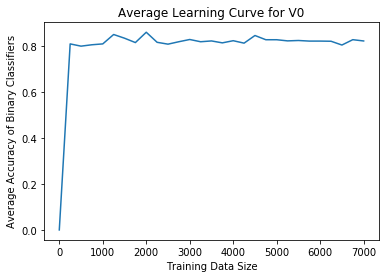

In [499]:
# Plot accuracy against training size
# model: v0

ITER = 100
RATIO = 0.7
x_data = np.arange(1, len(train_data), 250)
y_data = []

for digit in range(10):
    y_ = []
    for threshold in x_data:
        p = Percepton(dataset[:threshold], ratio, ITER, digit)
        y_.append(p.accuracy_v0(digit))
    y_data.append(y_)
    
plt.plot(x_data, np.mean(y_data, axis=0), label = str(digit))

plt.xlabel('Training Data Size')
plt.ylabel('Average Accuracy of Binary Classifiers')
plt.title('Average Learning Curve for V0')
plt.savefig('classP_average_learning_v0_digits.png')

## Results for V1

In [508]:
# testing
p = Percepton(dataset, 0.8, 10, 0)
print(p.accuracy_v1(0))

0.07116605412629469
